✅ Successfully loaded 50 epochs from training_log.csv


,Epoch,Train_Loss,Train_PSNR,Val_Accuracy,Val_AUC,Time(s),Latency(ms),VRAM(MB),FLOPS(G)
45,46,21846.4712,18.97,0.783,0.9324,59.27,11.03,1183.31,6.84
46,47,21832.6625,18.97,0.784,0.9320,71.77,5.00,1183.31,6.84
47,48,21796.7170,18.98,0.788,0.9331,58.28,10.88,1183.31,6.84
48,49,21554.5035,19.03,0.784,0.9333,61.72,3.43,1183.31,6.84
49,50,21424.4028,19.07,0.780,0.9332,59.28,11.12,1183.31,6.84


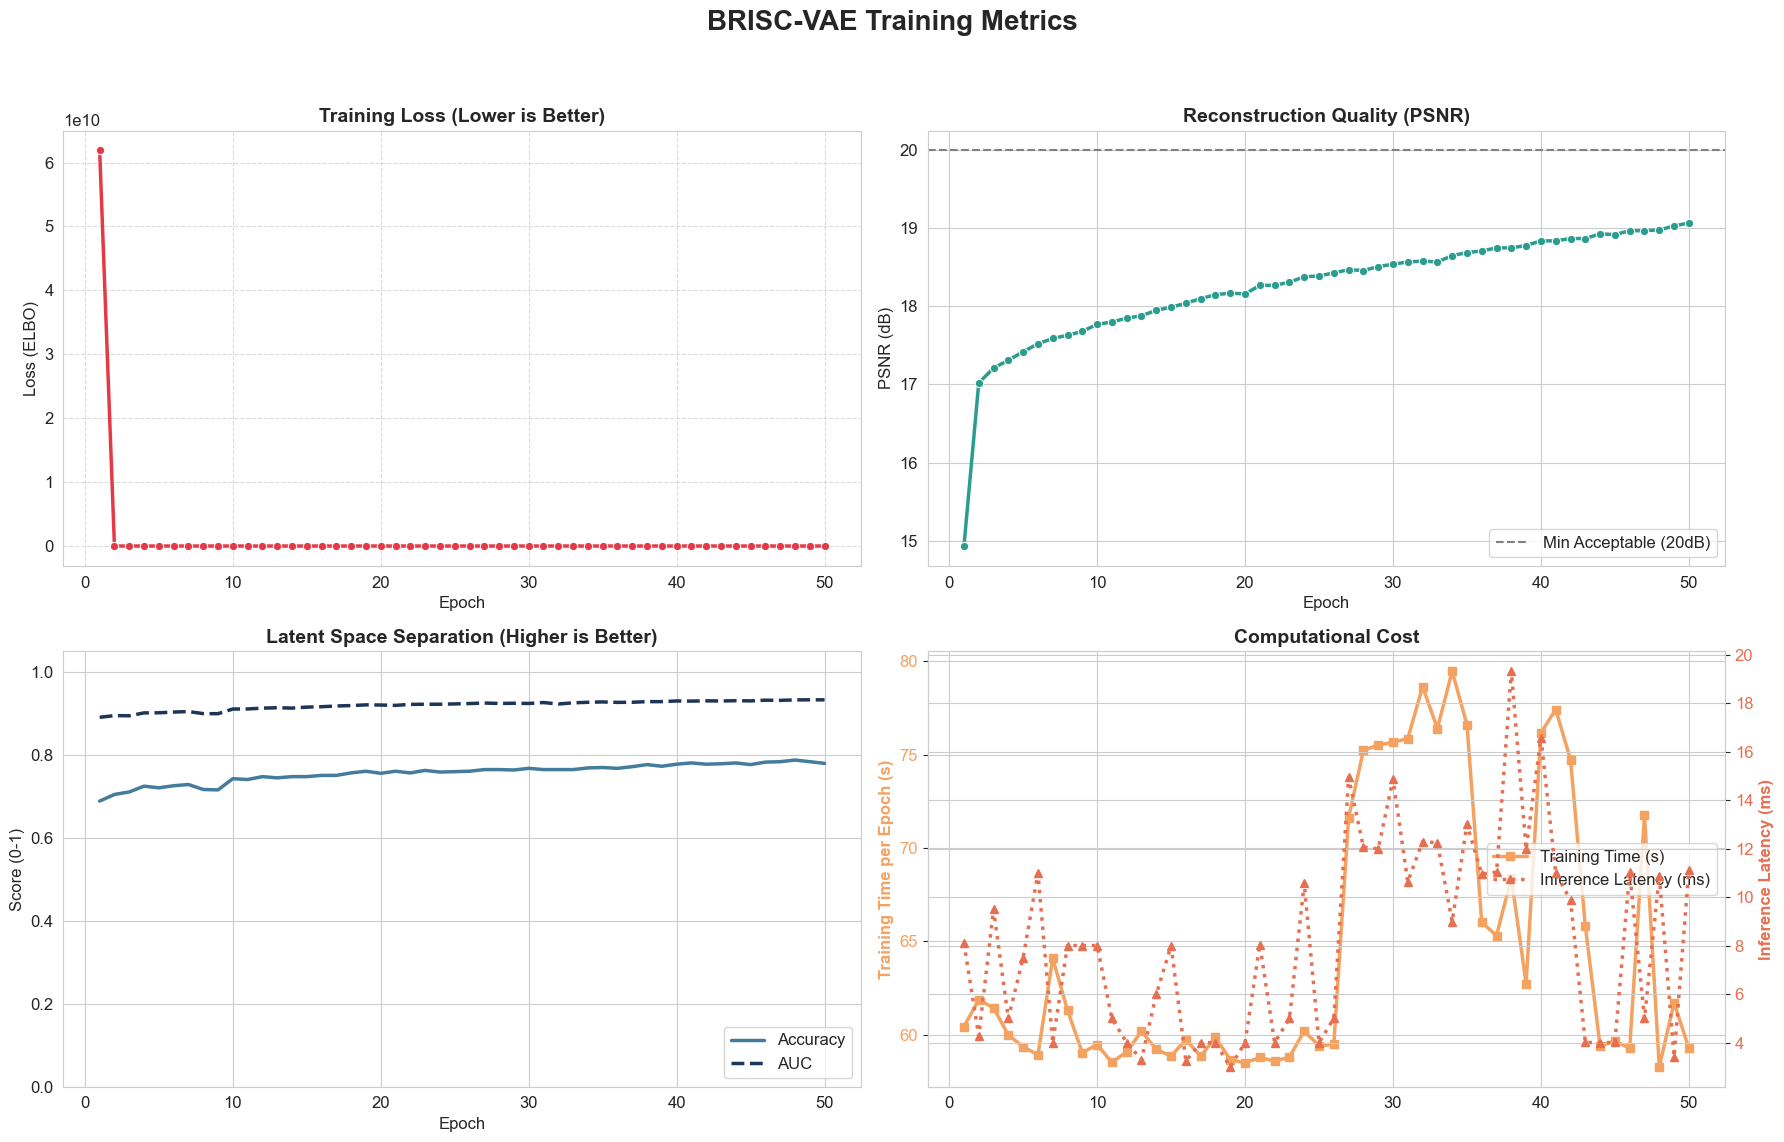


📊 **Training Summary**
🏆 Best Epoch: 48
   • Accuracy: 0.7880
   • AUC:      0.9331
   • PSNR:     18.98 dB
💻 Hardware Stats (Avg):
   • VRAM Used: 1183.31 MB
   • Latency:   8.20 ms


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load Data ---
# Ensure 'training_log.csv' is in the same folder as this notebook
csv_file = "training_log.csv"

try:
    df = pd.read_csv(csv_file)
    print(f"✅ Successfully loaded {len(df)} epochs from {csv_file}")
    display(df.tail()) # Show last 5 rows
except FileNotFoundError:
    print(f"❌ Error: Could not find '{csv_file}'. Make sure the file exists.")
    # Create dummy data for demonstration if file is missing
    print("⚠️ Generating dummy data for demonstration...")
    data = {
        'Epoch': range(1, 21),
        'Train_Loss': [10000/(x**0.5) for x in range(1, 21)],
        'Train_PSNR': [15 + x*0.5 for x in range(1, 21)],
        'Val_Accuracy': [0.6 + x*0.01 for x in range(1, 21)],
        'Val_AUC': [0.8 + x*0.005 for x in range(1, 21)],
        'Time(s)': [60] * 20,
        'Latency(ms)': [8] * 20,
        'VRAM(MB)': [1200] * 20,
        'FLOPS(G)': [6.84] * 20
    }
    df = pd.DataFrame(data)

# --- 2. Setup Plot Style ---
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})

# --- 3. Generate Plots ---
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('BRISC-VAE Training Metrics', fontsize=20, weight='bold')

# Plot A: Training Loss (The "Learning" Curve)
sns.lineplot(ax=axes[0, 0], x='Epoch', y='Train_Loss', data=df, color='#E63946', linewidth=2.5, marker='o')
axes[0, 0].set_title('Training Loss (Lower is Better)', fontsize=14, weight='bold')
axes[0, 0].set_ylabel('Loss (ELBO)')
axes[0, 0].grid(True, linestyle='--', alpha=0.7)

# Plot B: Reconstruction Quality (PSNR)
sns.lineplot(ax=axes[0, 1], x='Epoch', y='Train_PSNR', data=df, color='#2A9D8F', linewidth=2.5, marker='o')
axes[0, 1].set_title('Reconstruction Quality (PSNR)', fontsize=14, weight='bold')
axes[0, 1].set_ylabel('PSNR (dB)')
axes[0, 1].axhline(y=20, color='gray', linestyle='--', label='Min Acceptable (20dB)')
axes[0, 1].legend()

# Plot C: Unsupervised Classification (Acc & AUC)
sns.lineplot(ax=axes[1, 0], x='Epoch', y='Val_Accuracy', data=df, label='Accuracy', color='#457B9D', linewidth=2.5)
sns.lineplot(ax=axes[1, 0], x='Epoch', y='Val_AUC', data=df, label='AUC', color='#1D3557', linestyle='--', linewidth=2.5)
axes[1, 0].set_title('Latent Space Separation (Higher is Better)', fontsize=14, weight='bold')
axes[1, 0].set_ylabel('Score (0-1)')
axes[1, 0].set_ylim(0, 1.05)
axes[1, 0].legend(loc='lower right')

# Plot D: System Performance (Time & Latency)
ax4 = axes[1, 1]
line1 = ax4.plot(df['Epoch'], df['Time(s)'], color='#F4A261', label='Training Time (s)', linewidth=2.5, marker='s')
ax4.set_ylabel('Training Time per Epoch (s)', color='#F4A261', weight='bold')
ax4.tick_params(axis='y', labelcolor='#F4A261')
ax4.set_title('Computational Cost', fontsize=14, weight='bold')

# Create a twin axis for Latency
ax4_twin = ax4.twinx()
line2 = ax4_twin.plot(df['Epoch'], df['Latency(ms)'], color='#E76F51', label='Inference Latency (ms)', linewidth=2.5, linestyle=':', marker='^')
ax4_twin.set_ylabel('Inference Latency (ms)', color='#E76F51', weight='bold')
ax4_twin.tick_params(axis='y', labelcolor='#E76F51')

# Combine legends for dual axis
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax4.legend(lines, labels, loc='center right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
plt.show()

# --- 4. Print Summary Stats ---
print("\n📊 **Training Summary**")
best_epoch = df.loc[df['Val_Accuracy'].idxmax()]
print(f"🏆 Best Epoch: {int(best_epoch['Epoch'])}")
print(f"   • Accuracy: {best_epoch['Val_Accuracy']:.4f}")
print(f"   • AUC:      {best_epoch['Val_AUC']:.4f}")
print(f"   • PSNR:     {best_epoch['Train_PSNR']:.2f} dB")
print(f"💻 Hardware Stats (Avg):")
print(f"   • VRAM Used: {df['VRAM(MB)'].mean():.2f} MB")
print(f"   • Latency:   {df['Latency(ms)'].mean():.2f} ms")